In [1]:
from GCForest import gcForest
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
#用来计算程序运行时间
import datetime
starttime = datetime.datetime.now()

In [2]:
#读取32个通道的EEG数据，每个通道包含32×40=1280个信号样本（人次×每人次40实验）
#每个样本向量大小为8064点（63s*128Hz）
for eegCH in range(1,33,1):
    file_path = "./dump_file/CH{}_df_EEG_x".format(eegCH)
    locals()['CH{}_df_EEG_x'.format(eegCH)] = pickle.load(open(file_path,"rb"))
    #file_path = "./dump_file/CH{}eegfft_df".format(eegCH)
    #locals()["CH{}eegfft_df".format(eegCH)] = pickle.load(open(file_path,"rb"))
    
#读取Y
all_df_y_2c = pickle.load(open("./dump_file/all_df_y_2c","rb"))
print("Y.shape:",all_df_y_2c.shape)

Y.shape: (1280, 1)


In [3]:
maxDF = CH1_df_EEG_x.max(axis=1)
idx = maxDF.index
for i in range(0,1280,1):
    if maxDF.iloc[i]>1000:
        print(idx[i],maxDF.iloc[i])
    
#for i in CH1_df_EEG_x:
#    print(CH1_df_EEG_x.iloc[i].max())

s01_36 5206.648151289497
s01_37 5619.309766673956
s01_38 25116.730717973103
s02_32 1442.0025438767202
s02_36 3223.688371918979
s02_37 2110.596686087527
s02_38 6792.411560334105
s03_36 10138.58375202716
s03_37 4247.982466556272
s03_38 17689.896325723614
s04_17 1036.4085783440273
s04_36 1701.941743305768
s04_37 10095.819154719793
s04_38 16092.04946745059
s05_33 1067.3969535011984
s05_36 34090.72559557407
s05_37 7272.1345121505
s05_38 23753.12432810892
s06_36 20613.567724313267
s06_37 3284.687697002417
s06_38 10107.277151246773
s07_37 9382.656654104918
s07_38 6198.142893082599
s08_33 1044.483258860837
s08_36 50440.125741925265
s08_37 4812.486224928114
s08_38 3794.923957961364
s09_36 3361.2672632953618
s09_37 1863.7705633840385
s09_38 2072.9461942507187
s10_33 1930.8922655319889
s10_36 7335.336638274428
s10_37 1131.302027478101
s10_38 5456.385012502913
s11_3 2843.9056801961733
s11_13 1008.4322413926143
s11_20 1371.4447109254993
s11_23 1639.5542021385832
s11_24 2026.6257245030633
s11_26 181

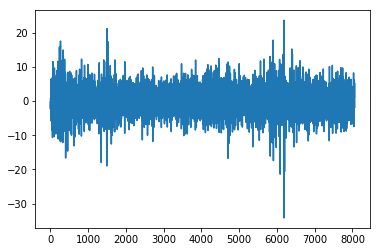

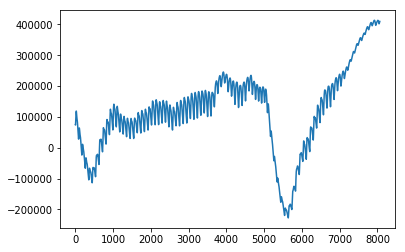

In [4]:
plt.plot(CH10_df_EEG_x.iloc[0,:])
plt.show()
plt.plot(CH1_df_EEG_x.loc['s23_38'])
plt.show()


In [5]:
#CH1_df_EEG_x
#X = np.ones([1280,8064])
#输入需要是np.array格式

#CH1_df_EEG_x.fillna(value=0.0,inplace=True)
X = CH1_df_EEG_x.values
#CH1eegfft_df.fillna(value=0.0,inplace=True)
#X = CH1eegfft_df.values

X = X.astype(np.float128)
#min_max_scaler = MinMaxScaler()
#X = min_max_scaler.fit_transform(X)

y = all_df_y_2c.values
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3,stratify=y)

print("X.shape:",X.shape)
print("y.shape:",y.shape)
print("X_tr.shape:",X_tr.shape)
print("X_te.shape:",X_te.shape)
print("y_tr.shape:",y_tr.shape)
print("y_te.shape:",y_te.shape)

X.shape: (1280, 8064)
y.shape: (1280, 1)
X_tr.shape: (896, 8064)
X_te.shape: (384, 8064)
y_tr.shape: (896, 1)
y_te.shape: (384, 1)


In [6]:
#CH2_df_EEG_x.fillna(value=0.0,inplace=True)
X_CH2 = CH2_df_EEG_x.values
#CH1eegfft_df.fillna(value=0.0,inplace=True)
#X = CH1eegfft_df.values

X_CH2 = X_CH2.astype(np.float128)
#min_max_scaler = MinMaxScaler()
#X_CH2 = min_max_scaler.fit_transform(X_CH2)

y = all_df_y_2c.values
X_tr_CH2, X_te_CH2, y_tr_CH2, y_te_CH2 = train_test_split(X_CH2, y, test_size=0.3,stratify=y)

print("X.shape:",X.shape)
print("y.shape:",y.shape)
print("X_tr.shape:",X_tr.shape)
print("X_te.shape:",X_te.shape)
print("y_tr.shape:",y_tr.shape)
print("y_te.shape:",y_te.shape)

X.shape: (1280, 8064)
y.shape: (1280, 1)
X_tr.shape: (896, 8064)
X_te.shape: (384, 8064)
y_tr.shape: (896, 1)
y_te.shape: (384, 1)


In [7]:
print(len([i for i in y_tr_CH2 if i==1]) / len([i for i in y_tr_CH2 if i==0]))
print(len([i for i in y if i==1]) / len([i for i in y if i==0]))


0.5582608695652174
0.5571776155717761


In [ ]:
#gcf = gcForest(shape_1X=[63,128], window=[4,8])
gcf = gcForest(shape_1X=8064, window=1024, stride=32,tolerance=0.0,n_cascadeRF=1, 
               min_samples_mgs=0.1, min_samples_cascade=0.1,n_jobs=19)
#gcf.fit(X_tr, y_tr)
X_tr_mgs = gcf.mg_scanning(X_tr, y_tr)
X_te_mgs = gcf.mg_scanning(X_te)

Slicing Sequence...
Training MGS Random Forests...


In [ ]:
#gcf = gcForest(shape_1X=[63,128], window=[4,8])
gcf = gcForest(shape_1X=8064, window=512, stride=32,tolerance=0.0,n_cascadeRF=1, 
               min_samples_mgs=0.1, min_samples_cascade=0.1,n_jobs=19)
#gcf.fit(X_tr, y_tr)
X_tr_mgs_ = gcf.mg_scanning(X_tr, y_tr)
X_te_mgs_ = gcf.mg_scanning(X_te)

In [ ]:
X_tr_vector = np.concatenate([X_tr_mgs,X_tr_mgs_],axis=1)
X_te_vector = np.concatenate([X_te_mgs,X_te_mgs_],axis=1)
print(X_tr_vector.shape)
print(X_te_vector.shape)

In [ ]:
X_tr_mgs_.max()

In [ ]:
#_ = gcf.cascade_forest(X_tr_vector, y_tr)
_ = gcf.cascade_forest(X_tr_mgs, y_tr)

In [ ]:
_ = gcf.cascade_forest(X_tr_mgs_, y_tr)

In [ ]:
#pred_X = gcf.predict(X_te)

In [ ]:
# evaluating accuracy
accuracy = accuracy_score(y_true=y_te, y_pred=pred_X)
print('gcForest accuracy : {}'.format(accuracy))

#用来计算程序运行时间
endtime = datetime.datetime.now()
print("程序运行时间:%.1fs"%(endtime - starttime).seconds)